# Precipitation Events Effect on Nutrient Fluxes

This code analyzes total dissolved nitrogen fluxes relationships with precipitation to find whether nutrient fluxes are associated with precipitation events.

@author = Madison Quill

@date = 2023-3-23

@license = MIT -- https://opensource.org/licenses/MIT

## Introduction

Nutrient fluxes are the concentration of nutrients flowing in a given volume over a given time. Nutrient fluxes can be affected by several parts of a watershed and large nutrient fluxes can have damaging effects on downstream ecosystems as well as cause problems such as eutrophication. Understanding the conditions in which large nutrient fluxes occur can help communities to learn what might be the best practices for managing nutrient fluxes in a watershed. If nutrient fluxes are higher during storm conditions, stormwater management practices could be implemented in a watershed to lower nutrient fluxes. This analysis looks specifically at total dissolved nitrogen fluxes because of the importance of nitrogen to all organisms and the possible detrimental effects of excess nitrogen in a watershed such as eutrophication. 

## Specific Hypothesis or Research Question

Do annual fluxes of total dissolved nitrogen in streamflow occur more during baseflow or stormflow in a non-urbanized watershed? 

## Study Site

Hubbard Brook is a watershed in the White Mountains of New Hampshire where long term ecological research has taken place. Hubbard Brook has precipitation, discharge and water chemistry data, dating back over 50 years in several different subwatersheds. The specific site of this study is Watershed 6. This is the biogeochemical reference watershed and so likely would not have human interference affecting the biogeochemical properties, taking that variable out of the equation.

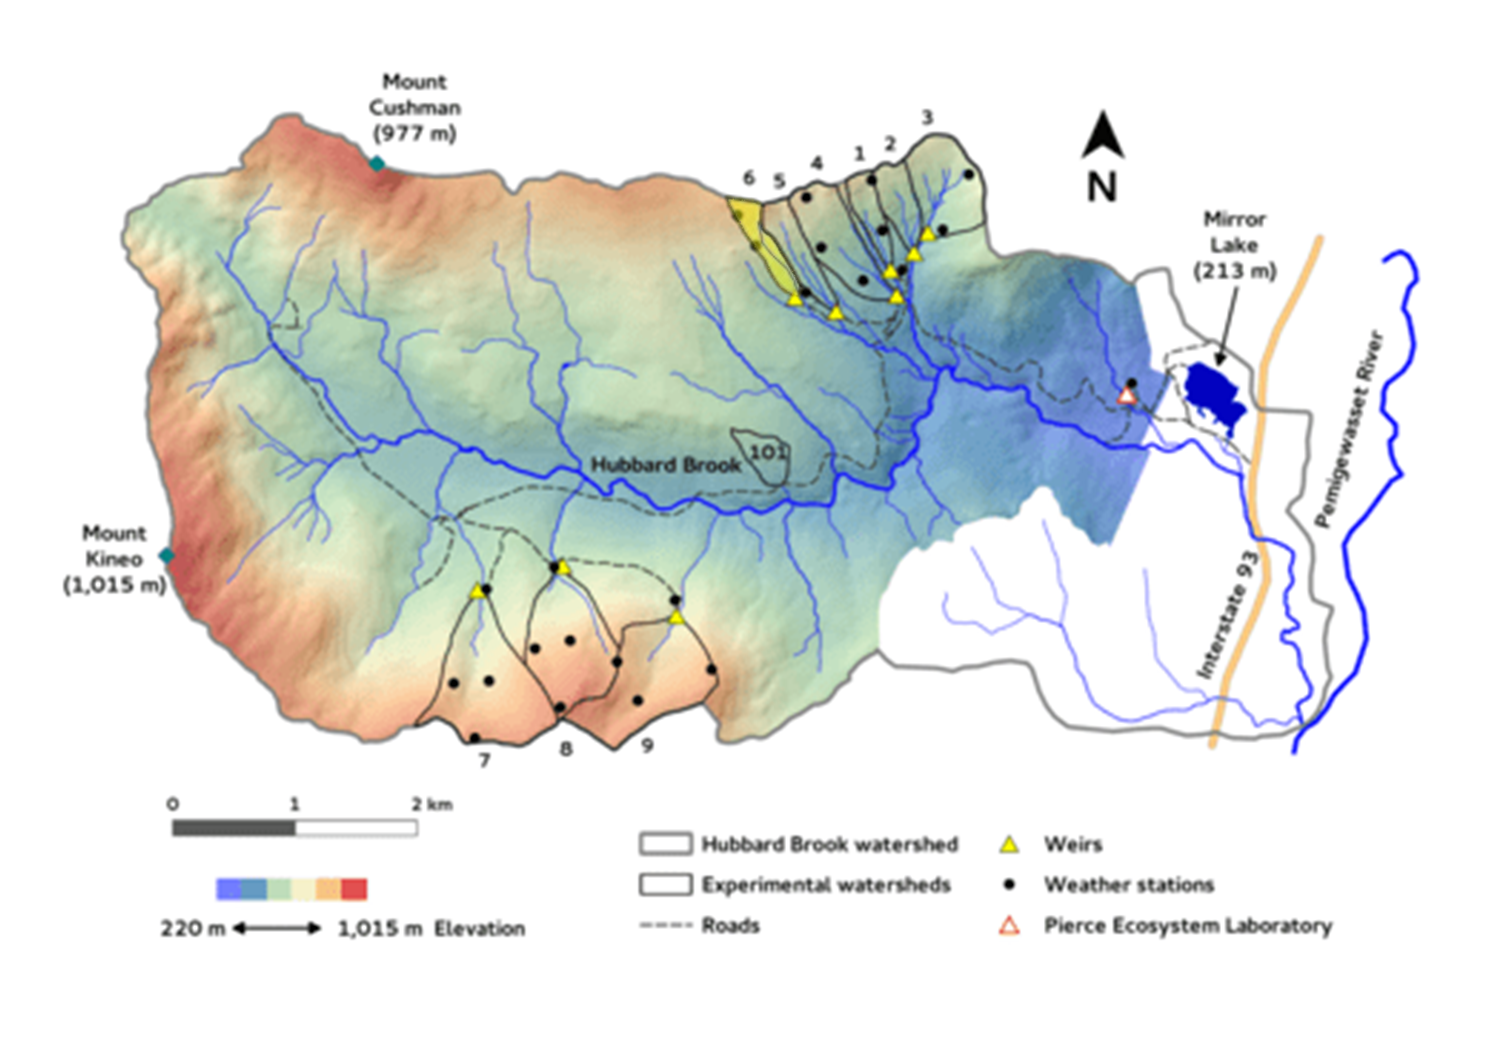
Figure 1: Hubbard Brook watershed features with Watershed 6 highlighted in yellow. Adapted from Fahey, 2022. Wiers are yellow triangles and weather stations are black dots.  

## Describe Data Sets

Daily Streamflow Dataset has daily streamflow measurements in mm/day for 9 different watersheds in Hubbard Brook from 1956-01-01 to 2022-07-07.

Daily Watershed Precipitation Dataset has daily precipitation in each watershed in mm/day for 9 different watersheds in Hubbard Brook from 1956-01-02 to 2022-09-15.

W6 Instantaneous Streamflow Dataset shows stream discharge in cubic feet per second and liters per second for Watershed 6 over less than daily intervals from 1963-01-01 to 2013-01-01.

Weekly Stream Chemistry Dataset shows concentrations of different nutrients in the stream in mg/L in the 9 different watersheds measured weekly from 1963-06-01 to 2021-05-24.


# Parameters

watershed_area - The area of the watershed in mi^2

short_period - the period that will be used to show how long precipitation affects discharge

precip_days - the amount of previous days of precipitation data that affects the discharge



In [1]:
#Specify Parameters

import os
import pandas as pd
from datetime import datetime
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

watershed_area = 0.051

short_period = ['2009-07-01','2009-07-10']


## Load and Plot Raw Data
The following code loads raw data from each dataset for Watershed 6 and plots a raw data time series for each of the data sets.

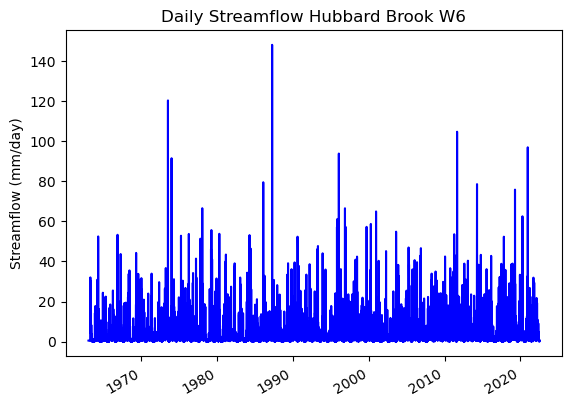

In [2]:
#Load and Provide initial Plot of Daily Streamflow

#Create list of file names
infile_names = ['Daily_Streamflow.csv','Daily_Watershed_Precipitation.csv','W6_Inst_Streamflow.csv','Weekly_Stream_Chemistry.csv']

#Read in Daily streamflow data
dayflow = pd.read_csv(infile_names[0], parse_dates = ['DATE'],
                 index_col=['DATE'])

#Locate and trim to watershed 6
dayflow = dayflow.loc[(dayflow['WS'] == 6)]

#Create Daily Streamflow plot
fig, ax = plt.subplots()

# Plot daily streamflow
ax.plot(dayflow['Streamflow'],  'b-')

# Add plot components 
ax.set_ylabel('Streamflow (mm/day)')          
ax.set_title('Daily Streamflow Hubbard Brook W6') 
  
# command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate()   


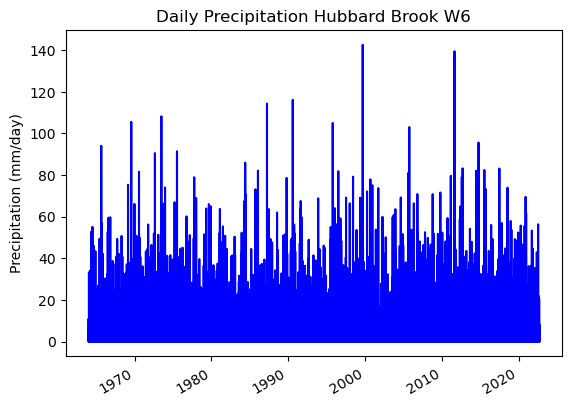

In [3]:
#Load and Provide initial Plot of Daily Precipitation

#Read in Daily Precipitation data
dayprecip = pd.read_csv(infile_names[1], parse_dates = ['DATE'],
                 index_col=['DATE'])

#Locate and trim to watershed 6
dayprecip = dayprecip.loc[(dayprecip['watershed'] == 'W6')]

#Create daily precipitation plot
fig, ax = plt.subplots()

# Plot daily precipitation
ax.plot(dayprecip['Precip'],  'b-')

# Add plot components 
ax.set_ylabel('Precipitation (mm/day)')          
ax.set_title('Daily Precipitation Hubbard Brook W6') 
  
# command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate()

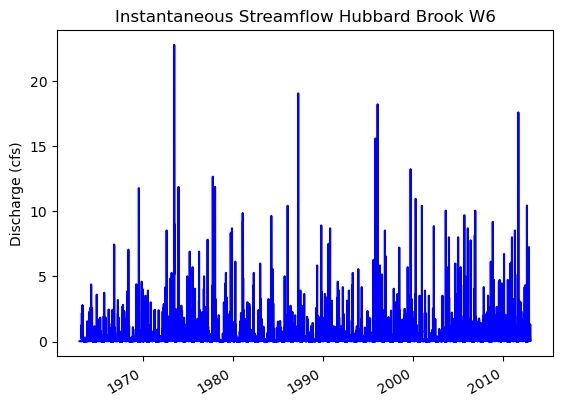

In [4]:
#Load and Provide initial Plot of Instantaneous Streamflow

#Read in Instant Streamflow data
instflow = pd.read_csv(infile_names[2], parse_dates = ['DATETIME'],
                 index_col=['DATETIME'])

#Create Instantaneous Streamflow data plot
fig, ax = plt.subplots()

# Plot instantaneous streamflow data
ax.plot(instflow['Discharge_cfs'],  'b-')

# Add plot components 
ax.set_ylabel('Discharge (cfs)')          
ax.set_title('Instantaneous Streamflow Hubbard Brook W6') 
  
# command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate()

C:\Users\Owner\AppData\Local\Temp\ipykernel_11052\973950834.py:4: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  streamchem = pd.read_csv(infile_names[3], parse_dates = ['date'],


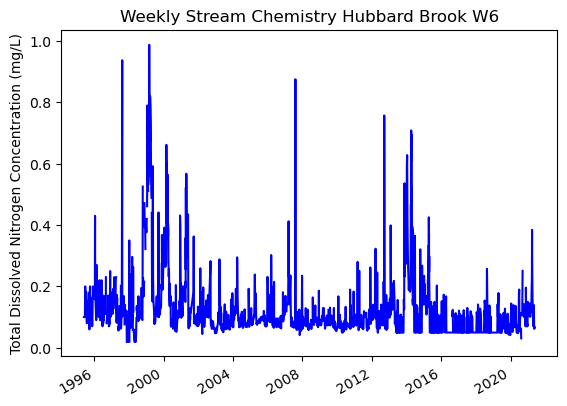

In [5]:
#Load and Provide initial Plot of Weekly stream chemistry

#Read in weekly stream chemistry data
streamchem = pd.read_csv(infile_names[3], parse_dates = ['date'],
                 index_col=['date'])

#Locate and trim to watershed 6 data
streamchem = streamchem.loc[(streamchem['site'] == 'W6')]

#Cut out extraneous information
streamchem = streamchem['TDN']

#Create TDN plot
fig, ax = plt.subplots()

# Plot TDN concentration
ax.plot(streamchem,  'b-')

# Add plot components 
ax.set_ylabel('Total Dissolved Nitrogen Concentration (mg/L)')          
ax.set_title('Weekly Stream Chemistry Hubbard Brook W6') 
  
# command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate() 

## Additional Steps To Take
1. Plot a time period in the summer that shows discharge during a precipitation event to see how long precipitation affects discharge.
2. Add discharge and precipitation data that affects the chemistry on the day of chemistry sampling.
3. Convert discharge to l/s and calculate nutrient flux using discharge and concentration.
4. Plot Q-c (discharge versus concentration) scatterplot graph with TDN (total dissolved nitrogen) concentrations with the line of best fit and correlation for the data.
5. Create a time plot of daily precipitation and nutrient fluxes.
6. Remove months affected by snowmelt and then plot precipitation amount versus TDN nutrient flux scatterplot with the line of best fit and correlation.


1. Plot a time period in the summer that shows discharge during a precipitation event to see how long precipitation affects discharge.

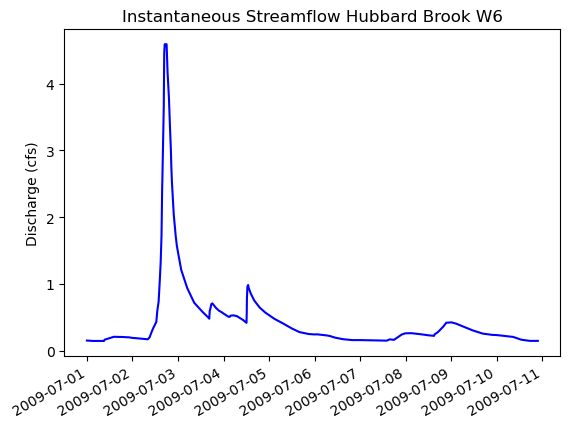

In [6]:
#Plot a summer month of discharge that has precipitation to see how long precipitation affects discharge.
qplot = instflow[short_period[0]:short_period[1]]

#Create Instantaneous Streamflow data plot
fig, ax = plt.subplots()

# Plot instantaneous streamflow data
ax.plot(qplot['Discharge_cfs'],  'b-')

# Add plot components 
ax.set_ylabel('Discharge (cfs)')          
ax.set_title('Instantaneous Streamflow Hubbard Brook W6') 
  
# command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate() 

Based on the short period of discharge data affected by precipitation, it seems as if precipitation generally goes through Watershed 6 within a day so the precipitation that occurs on the day of chemistry sampling is likely all that is needed to get a good estimate of how precipitation affects stream chemistry, such as total dissolved nitrogen.

2. Add discharge and precipitation data that affects the chemistry on the day of chemistry sampling. In step one, it was decided that only precipitation data from the day of sampling would be used for analysis. 

In [7]:
#Add discharge and precipitation data that affects the day of chemistry sampling

#Merge data sets
data = pd.merge(streamchem,dayprecip,left_index = True, right_index = True)
data = pd.merge(data,dayflow,left_index = True, right_index = True)

#Drop nan values for analysis
data = data.dropna()



3. Convert discharge to l/s and calculate nutrient flux using discharge and concentration. The following equations were used to perform this calculation. 
    
    Calc 1. Discharge = Streamflow * Watershed Area
    
    Calc 2. Nutrient Flux = Discharge * Concentration

In [8]:
#Convert Discharge to l/s and calculate nutrient flux using discharge and concentration

#Convert discharge to l/s
data['Discharge'] = data["Streamflow"]*watershed_area *(5280*5280) * (1/10.76)*(1/1000)*(1/86400) * 24.5 * (1/86400)

#Calculate nutrient flux
data['flux'] = data['Discharge']*data['TDN']

#Convert to daily flux
data['flux']= data['flux']*86400


Create a scatterplot function to use for steps 5 and 7. 

In [9]:
#Create Function
def regressplot(x_var,data_series, y_label,x_label, figtitle):
    """ Description
    Creates a scatterplot showing an independent variable and dependent variable, plots
    the best-fit line using linear techniques,
    calculates and returns, displayed on a figure, a confidence interval for 
    the regression slope, plus the p-value.
    
    Parameters
    ----------
    x_var : array or series
        Independent variable to plot on x-axis
    data_series : array or series
        Dependent variable to plot on y-axis with the same length as x    
    x_label : string
        Text to use as x-label on plot
    y_label : string
        Text to use as y-label on plot
    figtitle: string
        Title of Figure
    """
    

    #Calculate parametric linear regression values
    lsq_coeff = stats.linregress(x_var,data_series)

    #Create Plot
    fig, ax = plt.subplots()
    
    #Create Plot showing time series of input data series
    ax.plot(x_var,data_series, 'g.')
    
    #Plot parametric best fit line
    ax.plot(x_var, lsq_coeff.intercept + lsq_coeff.slope *
           x_var, 'b-', label='Linear regression')

    #Annotation Placement
    xx = ax.get_xlim()
    yy = ax.get_ylim()

    #Display least squares slope on graph
    ax.annotate(f'Least-squares slope = {lsq_coeff.slope:.5f} +/- {2*lsq_coeff.stderr:.7f}',
                xy=(xx[1]-0.05*(xx[1]-xx[0]), yy[0] + 0.70*(yy[1]-yy[0])),
                horizontalalignment='right')

    #Display least squares correlation on graph
    ax.annotate(f'Least-squares correlation = {lsq_coeff.rvalue:.3f}',
                xy=(xx[1]-0.05*(xx[1]-xx[0]), yy[0] + 0.65*(yy[1]-yy[0])),
                horizontalalignment='right')

    #Add plot components
    ax.set_title(figtitle)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.legend(loc='upper center')
    plt.show()
    
    print(f'The p-value is {lsq_coeff.pvalue}')
    
    

4. Plot Q-c (discharge versus concentration) scatterplot graph with TDN (total dissolved nitrogen) concentrations with the line of best fit and correlation for the data.

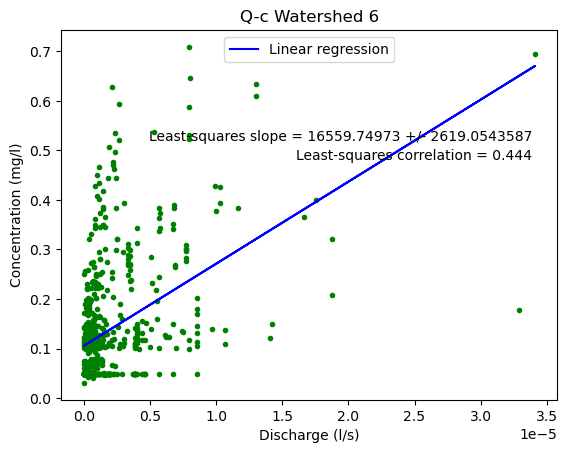

The p-value is 6.162499701965181e-33


In [10]:
#Plot Q-c scatterplot graph with TDN concentrations with line of best fit and correlation for the data.

#Plot
regressplot(data['Discharge'],data['TDN'],'Concentration (mg/l)', 'Discharge (l/s)', 'Q-c Watershed 6')



The plot shows a positive linear relationship with some correlation. Based on the p value this relationship is significnat.  

5. Create a time plot of daily precipitation and nutrient fluxes.

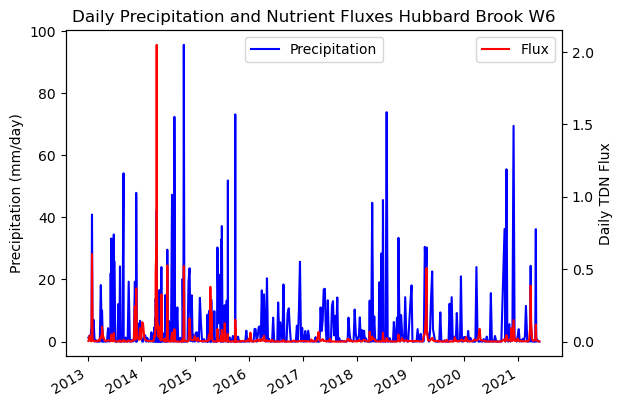

In [11]:
#Plot Time plot of daily precipitation and nutrient fluxes

#Create plot
fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

# Plot daily precipitation
ax1.plot(data['Precip'],  'b-', label = 'Precipitation')

#Plot Nurient Fluxes
ax2.plot(data['flux'], 'r-', label = 'Flux')

# Add plot components 
ax1.set_ylabel('Precipitation (mm/day)')   
ax2.set_ylabel('Daily TDN Flux') 
ax1.set_title('Daily Precipitation and Nutrient Fluxes Hubbard Brook W6') 
ax1.legend(loc='upper center')
ax2.legend()

# command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate() 

It seems as if high fluxes can occur along with high precipitation. However, sometimes flux is not associated with precipitation, and high precipitation is not necessarily associated with high flux.

6. Remove months affected by snowmelt and then plot precipitation amount versus TDN nutrient flux scatterplot with the line of best fit and correlation.


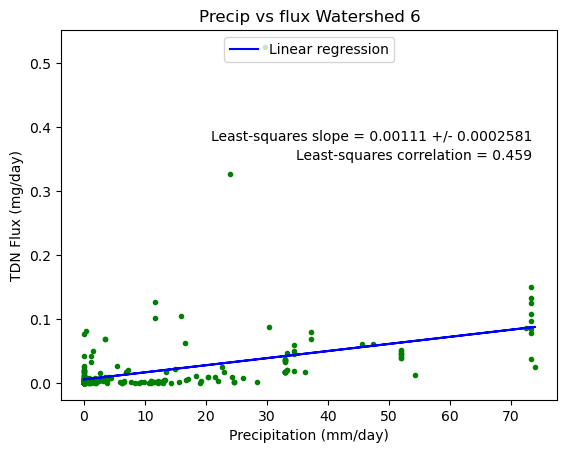

The p-value is 6.078065160687199e-16


In [12]:
#Remove months affected by snowmelt and plot precipitation amount versus TDN nutrient flux scatterplot with line of best fit and correlation

#Create Month Column
data['month'] = data.index.month

#Remove dates that could be affected by snowmelt
data = data[(data['month'] > 4) & (data['month'] < 10)]

#plot precipitation amount versus TDN
regressplot(data['Precip'],data['flux'],'TDN Flux (mg/day)', 'Precipitation (mm/day)', 'Precip vs flux Watershed 6')



There is a slight positive relationship between precipitation and TDN flux. There is some correlation between the two variables and the p value indicates that the relationship is statistically significant.

## Discussion/Conclusion

The data showed a positive relationship between discharge and concentration in the study site where increases in discharge generally led to increases in concentration in Hubbard Brook Watershed 6. This relationship is somewhat similar to previous research that shows a positive relationship between discharge and nitrate concentration in Hubbard Brook. This positive relationship between total dissolved nitrogen and stream discharge could indicate a relationship between nutrients and precipitation since increases in discharge are often caused by precipitation events. There was also a slight positive relationship between precipitation and total dissolved nitrogen flux. This suggests a relationship where TDN increases with increases in precipitation but there seems to be other factors affecting TDN at the same time. 

If nutrient flux increases with increasing precipitation, it might mean that nutrients stored in the land of the watershed are carried into the stream through runoff from precipitation or the increase could come from the precipiation itself. The information gained from studying the relationship between storm events and TDN fluxes could be useful for understanding possible causes of higher nutrient fluxes and whether they occur more often in dry or wet conditions. 

There are limitations to this method of analysis. One such limitation is the possible inaccurracies in the discharge, precipitation, and nitrogen concentration measurments taken. The nutrient concentration data is also only taken once a week which could miss some weekly variability in concentration data. Additionally, there was only around 10 years of overlapping data that was studied in this data. Finally, Watershed 6 of Hubbard Brook is only a small watershed with specific conditions that are not representative of all watersheds as a whole. 

One answer that would be interesting to know is whether or not the nutrients in the stream after a storm come from the precipitation itself or whether the nutrients come from the land in the watershed through runoff that entered the stream. Another interesting topic that could be further looked at is whether this analysis would look different in an urbanized watershed. 

Citations

Aulenbach, B. T., Burns, D. A., Shanley, J. B., Yanai, R. D., Bae, K., Wild, A. D., Yang, Y., &amp; Yi, D. (2016). Approaches to stream solute load estimation for solutes with varying dynamics from five diverse small watersheds. Ecosphere, 7(6). https://doi.org/10.1002/ecs2.1298 

Fahey, T. (2022, December 12). The Hubbard Brook Ecosystem Study: Site, history, and research approaches. Hubbard Brook Ecosystem Study. Retrieved April 26, 2023, from https://hubbardbrook.org/online-book-chapter/the-hubbard-brook-ecosystem-study-site-history-and-research-approaches/ 

Hubbard Brook Watershed Ecosystem Record (HBWatER). 2022. Continuous precipitation and stream chemistry data, Hubbard Brook Ecosystem Study, 1963 – present. ver 8. Environmental Data Initiative. https://doi.org/10.6073/pasta/5e9d1771f114913c2ca8c98520c230ad (Accessed 2023-04-27).

USDA Forest Service, Northern Research Station. 2022. Hubbard Brook Experimental Forest: Daily Precipitation Rain Gage Measurements, 1956 - present ver 18. Environmental Data Initiative. https://doi.org/10.6073/pasta/aed7e68772106753f3c7deef4f75e09c (Accessed 2023-04-27).

USDA Forest Service, Northern Research Station. 2022. Hubbard Brook Experimental Forest: Daily Streamflow by Watershed, 1956 - present ver 12. Environmental Data Initiative. https://doi.org/10.6073/pasta/15b300e96c2d2f9785d0155b3e18b0e9 (Accessed 2023-04-27).

USDA Forest Service, Northern Research Station. 2022. Hubbard Brook Experimental Forest: Instantaneous Streamflow by Watershed, 1956 – present ver 15. Environmental Data Initiative. https://doi.org/10.6073/pasta/3fb23a2cced495d48a939b5c9076d53c (Accessed 2023-04-27).

